# Prediction of Bitcoin 
   #Importing Library

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# New Section

#Load Data

In [ ]:
df = pd.read_csv('/content/BITCOIN DATASET 7151CEM.csv')

In [ ]:
df.head(2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38461 entries, 0 to 38460
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open              38461 non-null  float64
 1   high              38461 non-null  float64
 2   low               38461 non-null  float64
 3   close             38461 non-null  float64
 4   volume            38461 non-null  float64
 5   close_time        38461 non-null  object 
 6   quote             38461 non-null  float64
 7   takers_buy_base   38461 non-null  float64
 8   takers_buy_quote  38461 non-null  float64
dtypes: float64(8), object(1)
memory usage: 2.6+ MB


In [ ]:
#DELETE TIME FROM DATE
#df.close_time = pd.to_datetime(df.close_time).dt.date
#change object to datetime
df.close_time = pd.to_datetime(df.close_time)
#strip the milliseconds
df.close_time = pd.to_datetime(df["close_time"].dt.strftime('%Y-%m-%d %H:%M:%S'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38461 entries, 0 to 38460
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   open              38461 non-null  float64       
 1   high              38461 non-null  float64       
 2   low               38461 non-null  float64       
 3   close             38461 non-null  float64       
 4   volume            38461 non-null  float64       
 5   close_time        38461 non-null  datetime64[ns]
 6   quote             38461 non-null  float64       
 7   takers_buy_base   38461 non-null  float64       
 8   takers_buy_quote  38461 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 2.6 MB


In [ ]:
df.describe()

,open,high,low,close,volume,quote,takers_buy_base,takers_buy_quote
count,38461.000000,38461.000000,38461.000000,38461.000000,38461.000000,3.846100e+04,38461.000000,3.846100e+04
mean,17589.002805,17696.560219,17473.314191,17589.962025,2101.814189,4.369855e+07,1046.701701,2.159233e+07
std,17359.685254,17463.372583,17249.006318,17359.989729,2175.337360,7.080532e+07,1066.267302,3.481741e+07
min,2870.900000,2950.000000,2817.000000,2919.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,6726.000000,6752.760000,6695.490000,6726.110000,919.149470,7.125238e+06,470.170524,3.665090e+06
50%,9298.330000,9339.370000,9259.980000,9298.750000,1536.182670,1.545427e+07,773.216614,7.739254e+06
75%,19024.330000,19125.760000,18900.000000,19026.490000,2571.497519,5.187811e+07,1279.230445,2.529690e+07
max,68635.120000,69000.000000,68451.190000,68633.690000,47255.762690,1.514465e+09,20628.794050,6.849674e+08


In [ ]:
df.isnull().sum()

open                0
high                0
low                 0
close               0
volume              0
close_time          0
quote               0
takers_buy_base     0
takers_buy_quote    0
dtype: int64

In [ ]:
df = df.drop(['takers_buy_base'],axis = 1,inplace = False)

In [ ]:
df = df.drop(['takers_buy_quote'],axis = 1,inplace = False)

In [ ]:
df = df.drop(['quote'],axis = 1,inplace = False)

In [ ]:
  df.head(2)

,open,high,low,close,volume,close_time
0,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-16 23:59:59
1,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 00:59:59


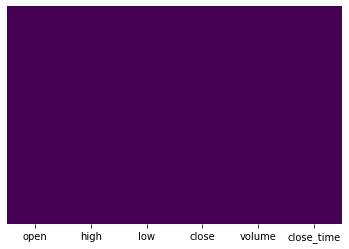

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap='viridis' )

In [ ]:
df = df.set_index('close_time')
df.head(3)

,open,high,low,close,volume
close_time,,,,,
2017-08-16 23:59:59,4261.48,4313.62,4261.32,4308.83,47.181009
2017-08-17 00:59:59,4308.83,4328.69,4291.37,4315.32,23.234916
2017-08-17 01:59:59,4330.29,4345.45,4309.37,4324.35,7.229691


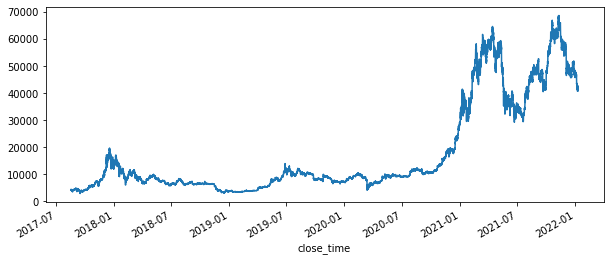

In [ ]:
df['close'].plot(figsize = (10,4))

In [ ]:
weekly_mean = df.rolling(7).mean()
quarterly_mean = df.rolling(90).mean()
annual_mean = df.rolling(365).mean()

In [ ]:
df["weekly_mean"] = weekly_mean["close"] / df["close"]
df["quarterly_mean"] = quarterly_mean["close"] / df["close"]
df["annual_mean"] = annual_mean["close"] / df["close"]

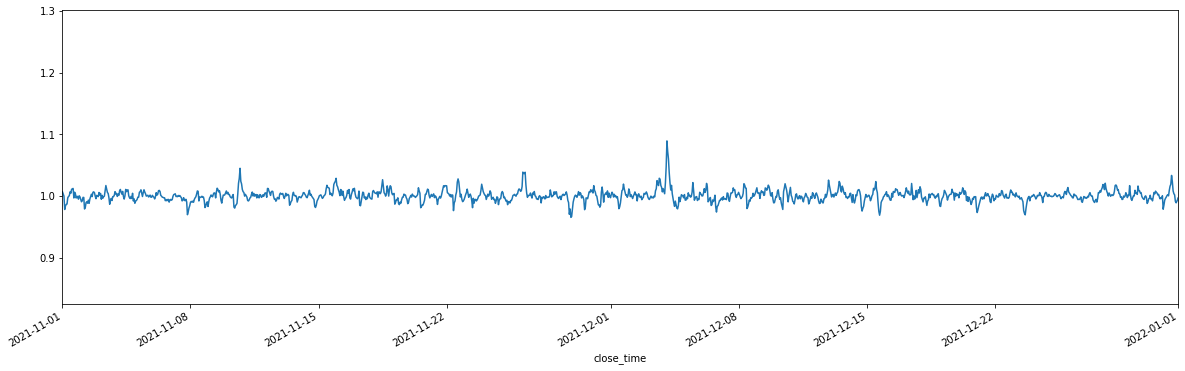

In [ ]:
df["weekly_mean"].plot(figsize =(20,6), xlim =['2021-11','2022-01'])

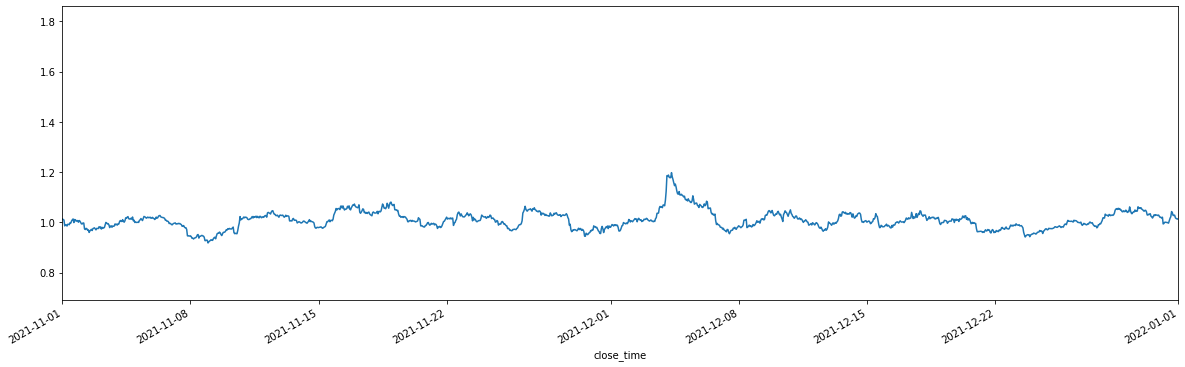

In [ ]:
df["quarterly_mean"].plot(figsize =(20,6),xlim =['2021-11','2022-01'])

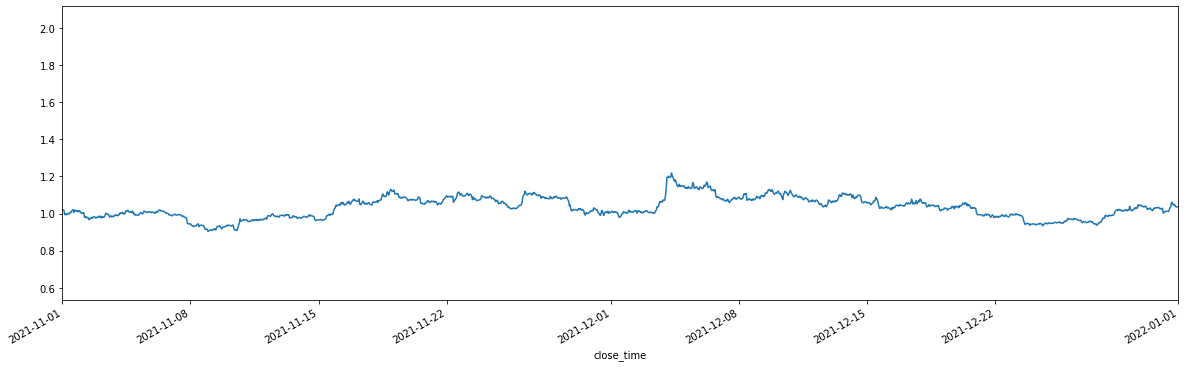

In [ ]:
df["annual_mean"].plot(figsize =(20,6), xlim = ['2021-11','2022-01'])

In [ ]:
df1=df.reset_index()['close']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

SVR


In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
import time
from sklearn.metrics import mean_absolute_error
def launch_model(name,model, X_train, y_train, X_test, ytest):
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ypred_train = model.predict(X_train)
    print ('MSE train', mean_absolute_error(y_train, ypred_train))
    print ('MSE test', mean_absolute_error(ytest, y_pred))
    print ('RMSE', math.sqrt(mean_squared_error(ytest,y_pred)))
    r_2 = model.score(X_test, ytest)
    print ('R^2 test', r_2)
    return name + '($R^2={:.3f}$)'.format(r_2), np.array(ytest), y_pred

In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', gamma=0.1)
print ('-----------')
print ('SVR - RBF')
print ('-----------')
results = launch_model('SVR - RBF', svr_rbf, X_train, y_train, X_test, ytest)

-----------
SVR - RBF
-----------
MSE train 0.03799129804189213
MSE test 0.06187369278788084
RMSE 0.09366280287968835
R^2 test 0.5752998997758615


MLP Regressor


In [ ]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(activation='tanh', alpha= 0.05, hidden_layer_sizes= (50, 50, 50), learning_rate= 'adaptive', solver= 'adam', max_iter=500).fit(X_train, y_train)
y_pred=regr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print("R2 : ", r2_score(y_pred, ytest)*100, '%')

R2 :  69.83468625405582 %


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(ytest,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(ytest,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(ytest,y_pred)))
print('Explained Variance Score:',metrics.explained_variance_score(ytest,y_pred))

Mean Absolute Error: 0.05213982222239735
Mean Squared Error: 0.003892019802106522
Root Mean Squared Error: 0.062386054548324514
Explained Variance Score: 0.9339268475702673


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Training Score: ', round(l_reg.score(X_train,y_train)*100,2),'%')
print('Testing Score: ', round(l_reg.score(X_test,ytest)*100,2))


Training Score:  99.97 %
Testing Score:  99.83


In [ ]:
y_pred = l_reg.predict(X_test)
y_pred

array([0.66388073, 0.64760295, 0.63598931, ..., 0.58859017, 0.58337596,
       0.58994198])

In [ ]:
print("R2 : ", r2_score(y_pred, ytest)*100, '%')

R2 :  99.82686519618869 %


In [ ]:
df_pred = pd.DataFrame({ 'Real Bitcoin Price': ytest, 'Predicted Bitcoin Price': y_pred})  
df_pred

,Real Bitcoin Price,Predicted Bitcoin Price
0,0.646404,0.663881
1,0.634716,0.647603
2,0.630987,0.635989
3,0.637183,0.634350
4,0.630809,0.636066
...,...,...
7587,0.582297,0.594103
7588,0.588690,0.584011
7589,0.584012,0.588590
7590,0.590366,0.583376


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',round(metrics.mean_absolute_error(ytest,y_pred),2))
print('Mean Squared Error:',round(metrics.mean_squared_error(ytest,y_pred),2))
print('Root Mean Squared Error:',round(np.sqrt(metrics.mean_squared_error(ytest,y_pred)),2))
print('Explained Variance Score:',metrics.explained_variance_score(ytest,y_pred))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.01
Explained Variance Score: 0.9982721672452618


RANDOM FOREST REGRESSION

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 10, max_depth= 5)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=10)

In [ ]:
print('Training Score: ',round(rf.score(X_train,y_train)*100,2),'%')
print('Testing Score: ',round(rf.score(X_test,ytest)*100,2))


Training Score:  99.86 %
Testing Score:  94.02


In [ ]:
y_pred = rf.predict(X_test)
y_pred

array([0.67344622, 0.67013514, 0.64818209, ..., 0.61505387, 0.61969508,
       0.6153526 ])

In [ ]:
from sklearn.metrics import r2_score
print("R2 : ", r2_score(y_pred, ytest)*100, '%')

R2 :  92.15223903146511 %


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',round(metrics.mean_absolute_error(ytest,y_pred),2))
print('Mean Squared Error:',round(metrics.mean_squared_error(ytest,y_pred),2))
print('Root Mean Squared Error:',round(np.sqrt(metrics.mean_squared_error(ytest,y_pred)),2))
print('Explained Variance Score:',metrics.explained_variance_score(ytest,y_pred))

Mean Absolute Error: 0.02
Mean Squared Error: 0.0
Root Mean Squared Error: 0.04
Explained Variance Score: 0.9455402634615597


LSTM

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(128,activation='sigmoid', return_sequences=True,input_shape=(100,1)))
model.add(Dropout(.5))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

Epoch 1/3
480/480 [==============================] - 166s 332ms/step - loss: 0.0101 - val_loss: 0.0052
Epoch 2/3
480/480 [==============================] - 164s 342ms/step - loss: 7.5197e-04 - val_loss: 0.0025
Epoch 3/3
480/480 [==============================] - 158s 330ms/step - loss: 3.9990e-04 - val_loss: 8.0769e-04


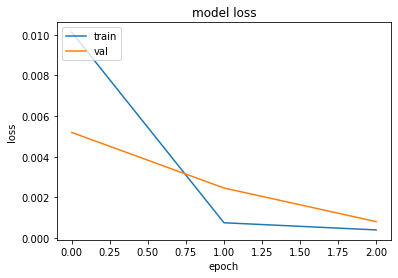

In [ ]:
history = model.fit(X_train, y_train, epochs=3, batch_size=64, verbose=1, validation_data=(X_test,ytest))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           35800     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 122,611
Trainable params: 122,611
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.032890748820824454

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.028419932011373536

In [ ]:
print("R2 : ", r2_score(ytest,test_predict)*100, '%')

R2 :  96.08984356462858 %


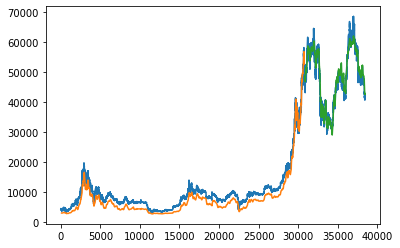

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(scaler.inverse_transform(trainPredictPlot))
plt.plot(scaler.inverse_transform(testPredictPlot))
plt.show()

In [ ]:
x_input=test_data[7593:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.60373527]
101
1 day input [0.61329514 0.61176032 0.61267838 0.61117704 0.60670072 0.61005994
 0.60686781 0.59171108 0.59014704 0.59244486 0.58754199 0.59024413
 0.59605562 0.60113743 0.59733722 0.59864271 0.60079413 0.58693452
 0.59310026 0.58434591 0.5967655  0.59460799 0.59025828 0.5912891
 0.59352331 0.5928052  0.58773495 0.58811021 0.5945838  0.59293303
 0.5929245  0.59182977 0.59319948 0.59427656 0.59352376 0.59339213
 0.59417278 0.59719843 0.59346944 0.59379752 0.59282498 0.59326157
 0.59077004 0.58882314 0.58475525 0.57708741 0.57461764 0.57691926
 0.57911511 0.59119247 0.59335455 0.58983372 0.59125654 0.5918109
 0.59621357 0.59217947 0.59591562 0.59114484 0.59278405 0.59153456
 0.58963483 0.58725089 0.5893005  0.59254057 0.59085693 0.58664204
 0.58764532 0.58894153 0.59688389 0.59614662 0.59420489 0.60528719
 0.60139339 0.5992724  0.59783239 0.59264709 0.58945998 0.59189688
 0.59360715 0.59421402 0.59755619 0.59518336 0.59356607 0.59535212
 0.59192001 0.59160303 0.59134236 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

38461

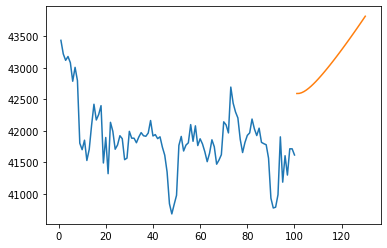

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[38361:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

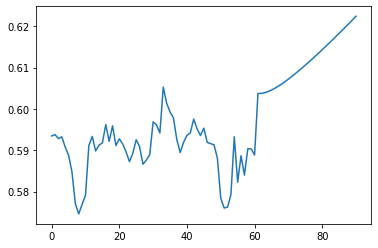

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[38400:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

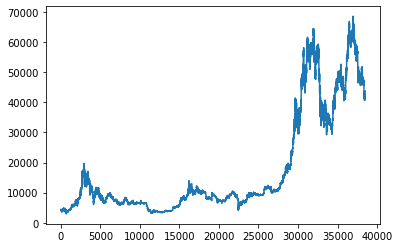

In [ ]:
plt.plot(df3)

CNN-LSTM HYBRID MODEL

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense, Dropout, Conv1D,Flatten, MaxPooling1D,Activation
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

In [ ]:
def evaluate_hybrid_model(X_train, y_train, X_test, ytest, kernel, verbose=1):
   X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

   epochs, batch_size = 15, 128
   n_timesteps, n_features, n_outputs = X_train1.shape[1], X_train1.shape[2], 1
   model = Sequential()
   model.add(Conv1D(filters=64, kernel_size=kernel[0], activation='relu', input_shape=(n_timesteps, n_features)))
   model.add(MaxPooling1D(pool_size=2))
   model.add(Conv1D(filters=50, kernel_size=kernel[1], activation='relu'))
   model.add(Dropout(0.3))
   model.add(MaxPooling1D(pool_size=2))
   model.add(LSTM(units=60, return_sequences=True))
   model.add(Dropout(0.2))
   model.add(LSTM(units=65))
   model.add(Dropout(0.2))
   model.add(Dense(units=65))
   model.add(Dense(units=n_outputs, activation="sigmoid"))

   # Reduce the learning rate once the learning stagnates, it is good in order
   # try to scratch those last decimals of accuracy.
   reduce_lr = ReduceLROnPlateau(monitor='accuracy',
                                  factor=0.1,
                                  patience=4,
                                  verbose=verbose,
                                  min_delta=0.001,
                                  mode='max')

   model.compile(optimizer='adam', loss='mean_squared_error')
   # Save an image of the model architecture
   plot_model(model, show_layer_names=False, show_shapes=True, to_file='CNN_LSTM.png')
   history = model.fit(X_train1, y_train1, epochs=epochs, batch_size=batch_size,
              verbose=verbose, shuffle=True,
              callbacks=[reduce_lr],
             validation_data=(X_val,y_val))
    
   plt.plot(history.history['loss'])
   plt.plot(history.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'val'], loc='upper left')
   plt.show()
   train_predict=model.predict(X_train)
   test_predict=model.predict(X_test)
   ### Plotting 
   # shift train predictions for plotting
   look_back=100
   trainPredictPlot = numpy.empty_like(df1)
   trainPredictPlot[:, :] = np.nan
   trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
   # shift test predictions for plotting
   testPredictPlot = numpy.empty_like(df1)
   testPredictPlot[:, :] = numpy.nan
   testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
   # plot baseline and predictions
   plt.plot(scaler.inverse_transform(df1))
   plt.plot(scaler.inverse_transform(trainPredictPlot))
   plt.plot(scaler.inverse_transform(testPredictPlot))
   plt.show()
   ### Test Data RMSE
   print("RMSE : ", math.sqrt(mean_squared_error(ytest,test_predict)))
   ### Test R2 Score
   print("R2 : ", r2_score(ytest,test_predict)*100, '%')
   return history

#Kernel: (3, 3)
Epoch 1/15
168/168 [==============================] - 42s 221ms/step - loss: 0.0150 - val_loss: 0.0018 - lr: 0.0010
Epoch 2/15
168/168 [==============================] - 26s 152ms/step - loss: 5.3889e-04 - val_loss: 0.0021 - lr: 0.0010
Epoch 3/15
168/168 [==============================] - 19s 112ms/step - loss: 3.1496e-04 - val_loss: 0.0017 - lr: 0.0010
Epoch 4/15
168/168 [==============================] - 19s 111ms/step - loss: 2.8985e-04 - val_loss: 0.0017 - lr: 0.0010
Epoch 5/15
168/168 [==============================] - 19s 114ms/step - loss: 2.6177e-04 - val_loss: 0.0016 - lr: 0.0010
Epoch 6/15
168/168 [==============================] - 19s 115ms/step - loss: 2.4314e-04 - val_loss: 0.0015 - lr: 0.0010
Epoch 7/15
168/168 [==============================] - 19s 110ms/step - loss: 2.3158e-04 - val_loss: 0.0016 - lr: 0.0010
Epoch 8/15
168/168 [==============================] - 19s 112ms/step - loss: 2.3363e-04 - val_loss: 0.0014 - lr: 0.0010
Epoch 9/15
168/168 [========

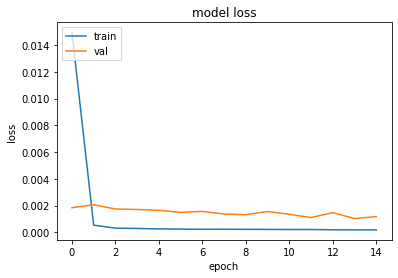

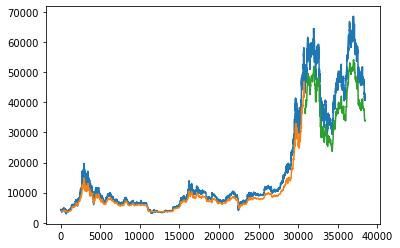

RMSE :  0.1399573942862308
R2 :  5.17130806567383 %
#Kernel: (5, 5)
Epoch 1/15
168/168 [==============================] - 23s 115ms/step - loss: 0.0171 - val_loss: 0.0020 - lr: 0.0010
Epoch 2/15
168/168 [==============================] - 18s 109ms/step - loss: 5.1769e-04 - val_loss: 0.0022 - lr: 0.0010
Epoch 3/15
168/168 [==============================] - 18s 109ms/step - loss: 4.0316e-04 - val_loss: 0.0015 - lr: 0.0010
Epoch 4/15
168/168 [==============================] - 18s 108ms/step - loss: 3.2315e-04 - val_loss: 0.0020 - lr: 0.0010
Epoch 5/15
168/168 [==============================] - 18s 108ms/step - loss: 2.7185e-04 - val_loss: 0.0014 - lr: 0.0010
Epoch 6/15
168/168 [==============================] - 18s 109ms/step - loss: 2.4788e-04 - val_loss: 0.0011 - lr: 0.0010
Epoch 7/15
168/168 [==============================] - 18s 109ms/step - loss: 2.7217e-04 - val_loss: 0.0014 - lr: 0.0010
Epoch 8/15
168/168 [==============================] - 18s 110ms/step - loss: 2.3847e-04 - val_lo

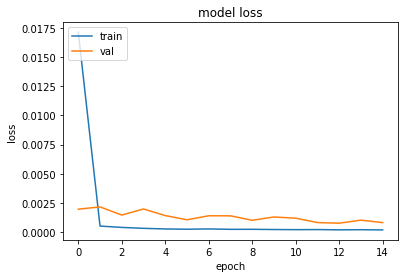

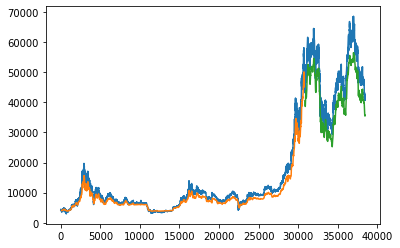

RMSE :  0.10094924733173805
R2 :  50.665102077852666 %


In [ ]:
kernel=((3, 3),
        (5,5),)
all_scores = []
#score,history = evaluate_model(trainX, trainy,testX , testy,kernel=k)

for k in kernel:
    print("#Kernel:", k)
# repeat experiment
    his = evaluate_hybrid_model(X_train, y_train, X_test, ytest,kernel=k)
    print(his)

CNN MODEL

Epoch 1/10
336/336 [==============================] - 11s 31ms/step - loss: 0.0261 - val_loss: 0.0226
Epoch 2/10
336/336 [==============================] - 11s 32ms/step - loss: 0.0062 - val_loss: 0.0042
Epoch 3/10
336/336 [==============================] - 11s 32ms/step - loss: 2.4476e-04 - val_loss: 0.0042
Epoch 4/10
336/336 [==============================] - 11s 32ms/step - loss: 1.9787e-04 - val_loss: 0.0042
Epoch 5/10
336/336 [==============================] - 11s 33ms/step - loss: 1.5057e-04 - val_loss: 0.0048
Epoch 6/10
336/336 [==============================] - 11s 32ms/step - loss: 1.4385e-04 - val_loss: 0.0046
Epoch 7/10
336/336 [==============================] - 10s 31ms/step - loss: 1.2836e-04 - val_loss: 0.0050
Epoch 8/10
336/336 [==============================] - 11s 32ms/step - loss: 1.1526e-04 - val_loss: 0.0050
Epoch 9/10
336/336 [==============================] - 11s 33ms/step - loss: 1.0396e-04 - val_loss: 0.0048
Epoch 10/10
336/336 [==============================] -

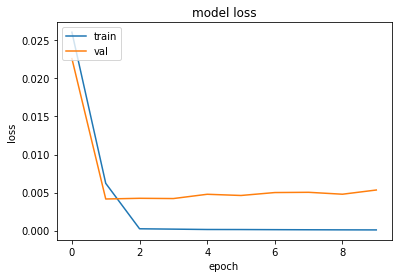

In [ ]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
EPOCHS = 10
BATCH_SIZE = 64
n_timesteps, n_features, n_outputs = X_train1.shape[1], X_train1.shape[2], 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=[3], activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=50, kernel_size=[5], activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(32))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
                  optimizer='adam')

cnn_history = model.fit(X_train1, y_train1,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_val, y_val))
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()  

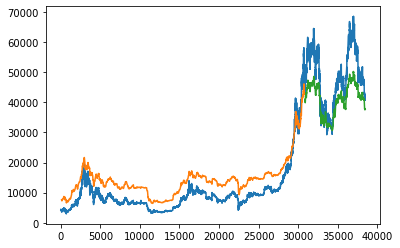

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(scaler.inverse_transform(trainPredictPlot))
plt.plot(scaler.inverse_transform(testPredictPlot))
plt.show()

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.07323410770907969

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.13103004218913336

In [ ]:
print("R2 : ", r2_score(ytest,  test_predict)*100, '%')

R2 :  16.88300657252605 %
